In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import unicodedata
import re

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
data=pd.read_excel("Copie de Challenge_dataset(1).xlsx",sheet_name="2019")
data.columns = data.columns.str.replace('_', ' ')



In [22]:
data.columns

Index(['Date de remplissage de la fiche', 'Date de naissance', 'Age',
       'Niveau d'etude', 'Genre ', 'Taille ', 'Poids',
       'Situation Matrimoniale (SM)', 'Profession ',
       'Arrondissement de résidence ', 'Quartier de Résidence ',
       'Nationalité ', 'Religion ', 'A-t-il (elle) déjà donné le sang ',
       'Si oui preciser la date du dernier don. ', 'Taux d’hémoglobine ',
       'ÉLIGIBILITÉ AU DON.',
       'Raison indisponibilité  [Est sous anti-biothérapie  ]',
       'Raison indisponibilité  [Taux d’hémoglobine bas ]',
       'Raison indisponibilité  [date de dernier Don < 3 mois ]',
       'Raison indisponibilité  [IST récente (Exclu VIH, Hbs, Hcv)]',
       'Date de dernières règles (DDR)  ',
       'Raison de l’indisponibilité de la femme [La DDR est mauvais si <14 jour avant le don]',
       'Raison de l’indisponibilité de la femme [Allaitement ]',
       'Raison de l’indisponibilité de la femme [A accoucher ces 6 derniers mois  ]',
       'Raison de l’indisponib

In [23]:
data['date_dernier_don_clean'] = pd.to_datetime(
    data['Si oui preciser la date du dernier don. '],
    errors='coerce',  # Convertit les erreurs en NaN
    format='%m/%d/%Y %H:%M',  # Ajustez le format si nécessaire
    dayfirst=True  # Si les dates sont au format jour/mois
)

In [24]:
a=data['date_dernier_don_clean'].median() 

In [25]:
data['date_dernier_don_clean']=data['date_dernier_don_clean'].fillna(a)

In [26]:
data['Date de remplissage de la fiche']=pd.to_datetime(
    data['Date de remplissage de la fiche'],
    errors='coerce',  # Convertit les erreurs en NaN
    format='%m/%d/%Y %H:%M',  # Ajustez le format si nécessaire
    dayfirst=True  # Si les dates sont au format jour/mois
)
b=data['Date de remplissage de la fiche'].median()

In [27]:
data['Date de remplissage de la fiche']=data['Date de remplissage de la fiche'].fillna(b)

In [28]:
data['Date de naissance']=pd.to_datetime(
    data['Date de naissance'],
    errors='coerce',  # Convertit les erreurs en NaN
    format='%m/%d/%Y %H:%M',  # Ajustez le format si nécessaire
    dayfirst=True  # Si les dates sont au format jour/mois
)
c=data['Date de naissance'].median()

In [29]:
data['Date de naissance']=data['Date de naissance'].fillna(b)

In [30]:
data['Jour']=data['Date de remplissage de la fiche'].dt.day
data['Jour']

0        6
1        9
2       30
3        7
4       17
        ..
1903     6
1904     9
1905     6
1906    15
1907     8
Name: Jour, Length: 1908, dtype: int32

In [31]:
data['Annee']=data['Date de remplissage de la fiche'].dt.year
data['Annee']

0       1992
1       1995
2       2013
3       2015
4       2018
        ... 
1903    2019
1904    2019
1905    2019
1906    2019
1907    2019
Name: Annee, Length: 1908, dtype: int32

In [32]:
data['Mois']=data['Date de remplissage de la fiche'].dt.month
data['Mois']

0       12
1        1
2        1
3        5
4        1
        ..
1903     5
1904    12
1905    12
1906     5
1907     5
Name: Mois, Length: 1908, dtype: int32

In [33]:
data['Jour de la semaine']=data['Date de remplissage de la fiche'].dt.day_name()
data['Jour de la semaine']

0          Sunday
1          Monday
2       Wednesday
3        Thursday
4       Wednesday
          ...    
1903       Monday
1904       Monday
1905       Friday
1906    Wednesday
1907    Wednesday
Name: Jour de la semaine, Length: 1908, dtype: object

In [34]:
bins = [1, 10, 20, 31]
labels = ['1-10', '11-20', '21-31']

data['periode_du_mois'] = pd.cut(
    data['Jour'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

# Affichage du résultat



In [35]:
data['mois_ecart'] = ((data['Date de remplissage de la fiche'].dt.to_period('M') - data['date_dernier_don_clean'].dt.to_period('M')).apply(lambda x: x.n))

In [36]:
data['mois_ecart'].unique()

array([-302, -278,  -59,  -31,    1,    2,   -4,  -22,   13,   96,    9,
         12,   11,   24,    8,    4,   22,   60,  204,  240,   72,    3,
        168,    5,   36,  180,   70,   46,   19,    7,    6,  178,  166,
         26,   10,   44,  132,   58,   14,   34,   20,   17,   48,  156,
         -8,   -5,  108,   -9,   45,  -20,  -19,  120,   84,   18,  -10,
         23,   59,   47,   35,   56,   68,   61,  170,   15,   -6,   38,
          0,  110,   91,  122,   50,  158,   62,   -7,   29,   98,   16,
        182,   37,   25,   49,   97,  380,   66,   30,   42,  347,   53,
         65,   77,   40,  101,  125,   41,   28,   52,   88,   64,  124,
        232,   43,   21,   92,   80,  188,  236,  152,  140,  105,   57,
         81,   93,  117,   32,   69,   33,  129,  228,   27,   71,  176,
        128,  104,   39,  200,   82,   90,  237,   54,   94,  118,  250,
         31, -338,  224,  225,  114,  174,  -24,  -40,  179,   83, -260,
        141,  103,  133,   76])

In [37]:
data['Type Donneur'] = pd.cut(data['mois_ecart'],
                             bins=[0, 3, 6, 12, 24, float('inf')],
                             labels=['Hyper-Régulier', 'Régulier', 'Occasionnel', 'Irrégulier', 'Nouveau/Retour'])

In [38]:
data['mois_ecart'] = data['mois_ecart'].mask(data['mois_ecart'] < 0, data[data['mois_ecart'] > 0]['mois_ecart'].median())

In [39]:
data.columns

Index(['Date de remplissage de la fiche', 'Date de naissance', 'Age',
       'Niveau d'etude', 'Genre ', 'Taille ', 'Poids',
       'Situation Matrimoniale (SM)', 'Profession ',
       'Arrondissement de résidence ', 'Quartier de Résidence ',
       'Nationalité ', 'Religion ', 'A-t-il (elle) déjà donné le sang ',
       'Si oui preciser la date du dernier don. ', 'Taux d’hémoglobine ',
       'ÉLIGIBILITÉ AU DON.',
       'Raison indisponibilité  [Est sous anti-biothérapie  ]',
       'Raison indisponibilité  [Taux d’hémoglobine bas ]',
       'Raison indisponibilité  [date de dernier Don < 3 mois ]',
       'Raison indisponibilité  [IST récente (Exclu VIH, Hbs, Hcv)]',
       'Date de dernières règles (DDR)  ',
       'Raison de l’indisponibilité de la femme [La DDR est mauvais si <14 jour avant le don]',
       'Raison de l’indisponibilité de la femme [Allaitement ]',
       'Raison de l’indisponibilité de la femme [A accoucher ces 6 derniers mois  ]',
       'Raison de l’indisponib

In [40]:
# Création des catégories
data['Type Donneur'] = pd.cut(data['mois_ecart'],
                             bins=[0, 3, 6, 12, 24, float('inf')],
                             labels=['Hyper-Régulier', 'Régulier', 'Occasionnel', 'Irrégulier', 'Nouveau/Retour'])

In [41]:
data['ÉLIGIBILITÉ AU DON.'].unique()

array(['Eligible', 'Temporairement Non-eligible',
       'Définitivement non-eligible'], dtype=object)

In [42]:
data['A-t-il (elle) déjà donné le sang '].unique()

array(['Oui', 'Non'], dtype=object)

In [43]:
data= data.drop_duplicates()# ayant melnger deux jeu de donner, nous supprimons les doublons pour voir si il y avait des inividus qui apparaisesait dans les deux.un doublons signifi que pour toutes les autres variable, ils ont les meme valeur
data

,Date de remplissage de la fiche,Date de naissance,Age,Niveau d'etude,Genre,Taille,Poids,Situation Matrimoniale (SM),Profession,Arrondissement de résidence,...,Raison de non-eligibilité totale [Scarifié],Si autres raison préciser,date_dernier_don_clean,Jour,Annee,Mois,Jour de la semaine,periode_du_mois,mois_ecart,Type Donneur
0,1992-12-06,1992-12-06,0,Pas Précisé,Homme,NaN,NaN,Célibataire,Technicien d’etancheite,Douala 5,...,NaN,NaN,2018-02-01 00:00:00,6,1992,12,Sunday,1-10,20,Irrégulier
1,1995-01-09,1995-05-11,0,Secondaire,Homme,NaN,NaN,Célibataire,Mécanicien,Douala 5,...,NaN,NaN,2018-03-17 00:00:00,9,1995,1,Monday,1-10,20,Irrégulier
2,2013-01-30,1980-11-22,33,Pas Précisé,Homme,NaN,NaN,Célibataire,Soudeur,Douala (Non précisé ),...,NaN,NaN,2017-12-26 12:00:00,30,2013,1,Wednesday,21-31,20,Irrégulier
3,2015-05-07,1991-11-24,24,Pas Précisé,Femme,NaN,96.0,Célibataire,Estheticien,Douala (Non précisé ),...,NaN,NaN,2017-12-26 12:00:00,7,2015,5,Thursday,1-10,20,Irrégulier
4,2018-01-17,1994-02-20,24,Universitaire,Homme,NaN,NaN,Célibataire,Etudiant (e),Douala (Non précisé ),...,NaN,NaN,2017-12-26 12:00:00,17,2018,1,Wednesday,11-20,1,Hyper-Régulier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1903,2019-05-06,1982-03-06,37,Universitaire,Homme,NaN,NaN,Célibataire,R A S,Douala 5,...,NaN,NaN,2017-12-26 12:00:00,6,2019,5,Monday,1-10,17,Irrégulier
1904,2019-12-09,1991-04-20,28,Secondaire,Homme,NaN,NaN,Célibataire,HOTELIER,Douala 2,...,NaN,NaN,2017-12-26 12:00:00,9,2019,12,Monday,1-10,24,Irrégulier
1905,2019-12-06,1997-01-12,22,Secondaire,Homme,NaN,NaN,Célibataire,Commerçant (e),Douala 3,...,NaN,NaN,2017-12-26 12:00:00,6,2019,12,Friday,1-10,24,Irrégulier
1906,2019-05-15,1991-05-05,28,Universitaire,Homme,NaN,NaN,Célibataire,TECHNICIEN GENIE CIVIL,Douala 5,...,NaN,NaN,2017-12-26 12:00:00,15,2019,5,Wednesday,11-20,17,Irrégulier




### traitement des nationalites

In [44]:
data["Nationalité "].unique()

array(['Camerounaise', 'Malienne', 'Centrafricaine', 'Non precisé',
       'Rien', 'AMERICAINE', 'Malien', 'Tchadienne', 'R.A.S', 'R A S',
       'RAS', 'R A S ', 'Ras', ' R A S', 'CENTRAFRICAINE'], dtype=object)

In [45]:
data["Nationalité "] = data["Nationalité "].replace(
    ['Malienne', 'Malien','Tchadienne','Centrafricaine','CENTRAFRICAINE'],
    "Autres Afrique"
)
data["Nationalité "] = data["Nationalité "].replace(
    ['R.A.S', 'R A S',
       'RAS', 'R A S ', 'Ras', ' R A S','Non precisé','AMERICAINE',
       'Rien'],
    "Non precise"
)




In [46]:
data["Nationalité "].unique()

array(['Camerounaise', 'Autres Afrique', 'Non precise'], dtype=object)

### traitement des quartiers

In [47]:
def nettoyer_texte(texte):
    if isinstance(texte, str):  # Vérifier si c'est bien une chaîne de caractères
        texte=texte.lower()
      
        
        texte_sans_accents = ''.join(c for c in unicodedata.normalize('NFD', texte) if unicodedata.category(c) != 'Mn')
        
        return texte_sans_accents.strip() # Supprimer les espaces en début et fin de chaîne
    return texte  # Retourner tel quel si ce n'est pas une chaîne
data["Quartier de Résidence clean"] = data["Quartier de Résidence "].apply(nettoyer_texte)



In [48]:
data["Quartier de Résidence clean"]=data["Quartier de Résidence clean"].str.replace('ras',"non precise")
data["Quartier de Résidence clean"]=data["Quartier de Résidence clean"].str.replace('r a s',"non precise")

In [49]:
data["Quartier de Résidence clean"].value_counts()

Quartier de Résidence clean
douala                   228
yassa                     73
non precise               71
bonaberi                  54
nyalla                    51
                        ... 
cite-sic                   1
rien                       1
pk 8 entree laique         1
bonaberi grand-hangar      1
nialla                     1
Name: count, Length: 391, dtype: int64

In [50]:

categories_cibles =[
        'douala',"bali", "bonamikengue", "bessengue", "bonamoudourou", "bona bekombo",
        "bonamouti akwa 2", "bonadibong", "deido", "bonanjo", "bonadoumbé",
        "bonapriso", "bonajinje", "bonateki", "bonakouamouang", "bonatene",
        "bonalembe", "bonantone", "bonajang", "hydrocarbures", "bonelang",
        "plateau joss", "bonoleke", "koumassi", "bonakeke akwa", "ngodi",
        "grand moulin", "nkongmondo", "nouvelle zone d'akwa nord", "nouvelle zone de new-deido",
        
        "aeroport", "babylone i", "babylone ii", "bonadouma", "congo",
        "kassalafam", "lagos market", "new bell", "mbam ewondo",
        "ndjong-mebi", "nkololoum", "ngangue", 
        "sabenjongo", "source", "t.s.f", "youpwe",
    
        "bonanloka", "bilongue", "bobongo", "boko", "bonadiwoto",
        "brazzaville", "c.c.c.", "cite berge", "cite de la paix", 
        "dibom", "japoma", "logbaba", "brazzaville", "madiba", 
        "ndokbati", "ndoghem ii", "ndogpassi", "ndogsimbi", 
        "ndokoti", "nkongui", "nyalla", "nylon", "oyack", 
        "pk 7", "kondi", "pom lien", "sincatex", "so-boum", 
        "song-mahop", "song-ngongag", "sopom", "tergal", "mbanga bakoko", 
        "pk 17", "pk 21",'pk 16','yassa','village','pk14','pk10','pk'
    
        "bonandale", "besseke", "bilingue", "bonamatoumbe", "bonambappe",
        "bonaminkano", "bonassama", "dje-bale", "mambanda", "ndobo",
        "ngwele", "nkomba", "sodiko", "bwape",
  
        "bangue", "beedi", "bepanda", "bonabeyike", "bonamoussadi (douala)",
        "bonangando", "bonangan", "cacao-barre", "cite des palmiers", 
        "cite sic", "dikahe", "emene city", "gentil", "jourdain",
        "kotto", "lendi", "logbessou", "logpom", "makepe", 
        "malangue", "manike", "mbengue city", "ndgbati", 
        "ndogbong", "ndonghe", "ngoma", "nguereck", "bomkul",
        "nkondi", "nguibassal", "sobikago", "sodikombo", "ndogsimb",
   
        "manoka", "dahomey", "number one creek", "nyangadou", "mbenadikoume",
        "epaka i", "epaka ii", "bubessoukoudou", "moukala tanda", "kombo",
        "bouma", "moungangue", "kombo moukoko", "poka i", "akra kombo",
        "cap cameroun", "petit tabe", "bikoro", "koo", "missipi", "matanda massadi"
    
]

In [51]:
import pandas as pd
from fuzzywuzzy import process


# Liste des catégories cibles
#categories_cibles = np.array(top_professions_df['Quartier'])

# Fonction pour attribuer la catégorie la plus proche avec gestion des faibles proximités
def attribuer_categorie(quartier, categories_cibles, seuil=70):
    match, score = process.extractOne(quartier, categories_cibles)
    return match if score >= seuil else "non precise"  # Si le score est faible, on met "autres"

# Application de la fonction sur la colonne "metier"
data["quartier_final"] = data["Quartier de Résidence clean"].apply(lambda x: attribuer_categorie(x, categories_cibles))

# Affichage du DataFrame mis à jour
data

c:\Users\FTAB TECH\dash\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


,Date de remplissage de la fiche,Date de naissance,Age,Niveau d'etude,Genre,Taille,Poids,Situation Matrimoniale (SM),Profession,Arrondissement de résidence,...,date_dernier_don_clean,Jour,Annee,Mois,Jour de la semaine,periode_du_mois,mois_ecart,Type Donneur,Quartier de Résidence clean,quartier_final
0,1992-12-06,1992-12-06,0,Pas Précisé,Homme,NaN,NaN,Célibataire,Technicien d’etancheite,Douala 5,...,2018-02-01 00:00:00,6,1992,12,Sunday,1-10,20,Irrégulier,bepanda,bepanda
1,1995-01-09,1995-05-11,0,Secondaire,Homme,NaN,NaN,Célibataire,Mécanicien,Douala 5,...,2018-03-17 00:00:00,9,1995,1,Monday,1-10,20,Irrégulier,pk14,pk14
2,2013-01-30,1980-11-22,33,Pas Précisé,Homme,NaN,NaN,Célibataire,Soudeur,Douala (Non précisé ),...,2017-12-26 12:00:00,30,2013,1,Wednesday,21-31,20,Irrégulier,ari,non precise
3,2015-05-07,1991-11-24,24,Pas Précisé,Femme,NaN,96.0,Célibataire,Estheticien,Douala (Non précisé ),...,2017-12-26 12:00:00,7,2015,5,Thursday,1-10,20,Irrégulier,douala douala,douala
4,2018-01-17,1994-02-20,24,Universitaire,Homme,NaN,NaN,Célibataire,Etudiant (e),Douala (Non précisé ),...,2017-12-26 12:00:00,17,2018,1,Wednesday,11-20,1,Hyper-Régulier,logbessou,logbessou
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1903,2019-05-06,1982-03-06,37,Universitaire,Homme,NaN,NaN,Célibataire,R A S,Douala 5,...,2017-12-26 12:00:00,6,2019,5,Monday,1-10,17,Irrégulier,ndogbom,ndobo
1904,2019-12-09,1991-04-20,28,Secondaire,Homme,NaN,NaN,Célibataire,HOTELIER,Douala 2,...,2017-12-26 12:00:00,9,2019,12,Monday,1-10,24,Irrégulier,new bell,new bell
1905,2019-12-06,1997-01-12,22,Secondaire,Homme,NaN,NaN,Célibataire,Commerçant (e),Douala 3,...,2017-12-26 12:00:00,6,2019,12,Friday,1-10,24,Irrégulier,yassa,yassa
1906,2019-05-15,1991-05-05,28,Universitaire,Homme,NaN,NaN,Célibataire,TECHNICIEN GENIE CIVIL,Douala 5,...,2017-12-26 12:00:00,15,2019,5,Wednesday,11-20,17,Irrégulier,bepanda,bepanda


In [52]:
data[data["quartier_final"]=="non precise"]

,Date de remplissage de la fiche,Date de naissance,Age,Niveau d'etude,Genre,Taille,Poids,Situation Matrimoniale (SM),Profession,Arrondissement de résidence,...,date_dernier_don_clean,Jour,Annee,Mois,Jour de la semaine,periode_du_mois,mois_ecart,Type Donneur,Quartier de Résidence clean,quartier_final
2,2013-01-30,1980-11-22,33,Pas Précisé,Homme,NaN,NaN,Célibataire,Soudeur,Douala (Non précisé ),...,2017-12-26 12:00:00,30,2013,1,Wednesday,21-31,20,Irrégulier,ari,non precise
12,2019-01-02,1985-02-11,34,Secondaire,Homme,NaN,NaN,Célibataire,Maçon,Douala 3,...,2017-12-26 12:00:00,2,2019,1,Wednesday,1-10,13,Irrégulier,dakar,non precise
13,2019-01-02,1985-12-14,34,Secondaire,Homme,NaN,NaN,Célibataire,Commerçant (e),Douala 3,...,2017-12-26 12:00:00,2,2019,1,Wednesday,1-10,13,Irrégulier,dakar,non precise
14,2019-01-02,1998-11-20,21,Secondaire,Homme,NaN,NaN,Célibataire,Eleve,Douala (Non précisé ),...,2017-12-26 12:00:00,2,2019,1,Wednesday,1-10,13,Irrégulier,dakar,non precise
21,2019-01-03,1984-04-01,35,Universitaire,Femme,NaN,NaN,Célibataire,Chargée de communication,Yaounde,...,2017-12-26 12:00:00,3,2019,1,Thursday,1-10,13,Irrégulier,bastos,non precise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1842,2019-12-10,1993-05-26,26,Universitaire,Homme,NaN,NaN,Célibataire,DECLARANT DOUANE,Douala 5,...,2019-01-01 00:00:00,10,2019,12,Tuesday,1-10,11,Occasionnel,pk9,non precise
1848,2019-07-23,1996-10-28,0,Secondaire,Homme,NaN,NaN,Célibataire,Sans Emplois,Douala 5,...,2018-06-18 00:00:00,23,2019,7,Tuesday,21-31,13,Irrégulier,pk9,non precise
1850,1994-05-30,1994-05-20,0,Pas Précisé,Homme,NaN,NaN,Célibataire,Maçon,Douala 5,...,2016-01-01 00:00:00,30,1994,5,Monday,21-31,20,Irrégulier,ange raphael,non precise
1879,2019-02-26,1994-06-01,25,Universitaire,Homme,NaN,NaN,Célibataire,PEINTRE,Douala (Non précisé ),...,2017-12-26 12:00:00,26,2019,2,Tuesday,21-31,14,Irrégulier,pk9,non precise


### traitement des arrondissements

In [53]:
data['Arrondissement de résidence '].unique()

array(['Douala 5', 'Douala (Non précisé )', 'Douala 3', 'Douala 1',
       'Yaounde', 'Douala 2', 'Douala 4', 'Bafoussam', 'Dschang',
       'Non précisé', 'Buea', 'Kribi', 'Pas précisé', 'Njombe', 'TIKO',
       'Edea', 'Manjo', 'West', 'Douala', 'Yaoundé', 'OYACK', 'Nkouabang',
       'BUEA', 'Deido', 'Pas mentionné', 'Douala 6', 'batie',
       'Bomono Ba Mbegue', 'Meiganga', 'Pas precise', 'non precisé',
       'SUD OUEST TOMBEL', 'Pas précisé ', 'Ngodi Bakoko ', 'Ras',
       'R A S ', 'LIMBE ', 'R A S', 'RAS', 'DCANKONGMONDO', 'BOKO',
       'RAS '], dtype=object)

In [54]:
mapping={


'Douala 3':'Douala 3e',

'Douala 2':'Douala 2e',

'Douala 1':'Douala 1er',

'Douala 4':'Douala 4e',

'Douala 5':'Douala 5e',

'Douala 6':'Douala 6e',
'Douala (Non précisé )':'Douala (Non précisé )',

    "deido":"Douala 1er",
    "Deido":"Douala 1er",
    'Douala':'Douala (Non précisé )', 
    'Yaoundé':'Arrondissement Centre',
    'Yaounde':'Arrondissement Centre',
    'OYACK': 'Arrondissement Centre',
    'Nkouabang':'Arrondissement Centre',
    "Bafoussam":"Arrondissemnt Ouest",
    'batie':"Arrondissemnt Ouest",
    'Dschang':"Arrondissemnt Ouest",
    'West':"Arrondissemnt Ouest",

    'Meiganga':"Arrondissemnt Nord",
    'SUD OUEST TOMBEL':"Arrondissemnt Sud Ouest",
    'Ngodi Bakoko':'Douala 3e',
    'DCANKONGMONDO':'Douala 1er',
    'BOKO':"Arrondissement Centre",
    'Buea':"Arrondissemnt Sud Ouest",
    'BUEA':"Arrondissemnt Sud Ouest",
    'Kribi':"Arrondissemnt Sud",
    'Bomono Ba Mbegue':"Arrondissemnt Littoral hors douala",
    'Ngodi Bakoko ':'Douala 3e',
    'LIMBE ':"Arrondissemnt Sud Ouest",


    'Njombe':"Arrondissemnt Littoral hors douala",
    'Edea':'Arrondissement Centre',
    'Manjo': "Arrondissemnt Littoral hors douala",
    'TIKO':"Arrondissemnt Sud Ouest",
    'R A S ':'Non précise',
    'Non précisé':'Non précise',
    'Pas précisé':'Non précise',
    'Pas mentionné':'Non précise',
    'Pas precise':'Non précise',
    'non precisé':'Non précise',
    'Pas précisé ':'Non précise',
    'Ras': 'Non précise',
    'R A S ': 'Non précise',
    'R A S': 'Non précise',
    'RAS': 'Non précise',
    'RAS ':'Non précise'


}
data["New_Arrondissement"]=data["Arrondissement de résidence "].map(mapping)



In [55]:
data["New_Arrondissement"].unique()

array(['Douala 5e', 'Douala (Non précisé )', 'Douala 3e', 'Douala 1er',
       'Arrondissement Centre', 'Douala 2e', 'Douala 4e',
       'Arrondissemnt Ouest', 'Non précise', 'Arrondissemnt Sud Ouest',
       'Arrondissemnt Sud', 'Arrondissemnt Littoral hors douala',
       'Douala 6e', 'Arrondissemnt Nord'], dtype=object)

In [56]:
#Ajouter de la Region
mapping={


'Douala 3e':'LITTORAL',

'Douala 2e':'LITTORAL',

'Douala 1er':'LITTORAL',

'Douala 4e':'LITTORAL',

'Douala 5e':'LITTORAL',

'Douala 6e':'LITTORAL',
'Douala (Non précisé )':'LITTORAL',
'Arrondissement Centre':'CENTRE',

"Arrondissemnt Ouest":'OUEST',
'Arrondissemnt Nord':"NORD",
"Arrondissemnt Sud Ouest":'SUD-OUEST',
"Arrondissemnt Sud":'SUD',
"Arrondissemnt Littoral hors douala":'LITTORAL',
"Non précise":'LITTORAL'

}
data["Region"]=data["New_Arrondissement"].map(mapping)


In [57]:
data["Region"].unique()

array(['LITTORAL', 'CENTRE', 'OUEST', 'SUD-OUEST', 'SUD', 'NORD'],
      dtype=object)

In [58]:

quartier_douala={
    
       'Douala 1er':[ "bali", "bonamikengue", "bessengue", "bonamoudourou", "bona bekombo",
        "bonamouti akwa 2", "bonadibong", "deido", "bonanjo", "bonadoumbé",
        "bonapriso", "bonajinje", "bonateki", "bonakouamouang", "bonatene",
        "bonalembe", "bonantone", "bonajang", "hydrocarbures", "bonelang",
        "plateau joss", "bonoleke", "koumassi", "bonakeke akwa", "ngodi",
        "grand moulin", "nkongmondo", "nouvelle zone d'akwa nord", "nouvelle zone de new-deido"],
       
        'Douala 2e':["aeroport", "babylone i", "babylone ii", "bonadouma", "congo",
        "kassalafam", "lagos market", "lycee de new bell", "mbam ewondo",
        "ndjong-mebi", "nkololoum", "ngangue", "prison centrale de new bell",
        "sabenjongo", "source", "t.s.f", "youpwe"],
    
        'Douala 3e':["bonanloka", "bilongue", "bobongo", "boko", "bonadiwoto",
        "brazzaville", "c.c.c.", "cite berge", "cite de la paix", 
        "dibom", "japoma", "logbaba", "brazzaville", "madiba", 
        "ndokbati", "ndoghem ii", "ndogpassi", "ndogsimbi", 
        "ndokoti", "nkongui", "nyalla", "nylon", "oyack", 
        "pk 7", "kondi", "pom lien", "sincatex", "so-boum", 
        "song-mahop", "song-ngongag", "sopom", "tergal", "mbanga bakoko", 
        "pk 17", "pk 21",'pk 16','yassa','village'],
    
        'Douala 4e':["bonandale", "besseke", "bilingue", "bonamatoumbe", "bonambappe",
        "bonaminkano", "bonassama", "dje-bale", "mambanda", "ndobo",
        "ngwele", "nkomba", "sodiko", "bwape"],
  
        'Douala 5e':["bangue", "beedi", "bepanda", "bonabeyike", "bonamoussadi (douala)",
        "bonangando", "bonangan", "cacao-barre", "cite des palmiers", 
        "cite sic", "dikahe", "emene city", "gentil", "jourdain",
        "kotto", "lendi", "logbessou", "logpom", "makepe", 
        "malangue", "manike", "mbengue city", "ndgbati", 
        "ndogbong", "ndonghe", "ngoma", "nguereck", "bomkul",
        "nkondi", "nguibassal", "sobikago", "sodikombo", "ndogsimb"],
   
        'Doula 6e':["manoka", "dahomey", "number one creek", "nyangadou", "mbenadikoume",
        "epaka i", "epaka ii", "bubessoukoudou", "moukala tanda", "kombo",
        "bouma", "moungangue", "kombo moukoko", "poka i", "akra kombo",
        "cap cameroun", "petit tabe", "bikoro", "koo", "missipi", "matanda massadi"]
    
}

In [59]:


# Fonction de regroupement
def regrouper_profession(arrondissemnt):
    for categorie, professions in quartier_douala.items():
        if arrondissemnt in professions:
            return categorie
    return 'None'  # Par défaut, si la profession n'est pas trouvée

# Exemple d'utilisation

# Appliquer le regroupement
data['Arrondissement_final'] = data['quartier_final'].apply(regrouper_profession)


In [60]:
data['Arrondissement_final'].value_counts()

Arrondissement_final
Douala 3e     663
None          590
Douala 5e     387
Douala 1er    202
Douala 2e      17
Douala 4e      10
Doula 6e        4
Name: count, dtype: int64

In [61]:
data["New_Arrondissement"].value_counts()

New_Arrondissement
Douala (Non précisé )                 961
Douala 3e                             389
Douala 5e                             218
Douala 2e                              78
Douala 1er                             74
Douala 4e                              62
Non précise                            42
Arrondissement Centre                  29
Arrondissemnt Sud Ouest                 6
Arrondissemnt Ouest                     4
Arrondissemnt Littoral hors douala      3
Douala 6e                               3
Arrondissemnt Sud                       2
Arrondissemnt Nord                      2
Name: count, dtype: int64

In [62]:
data["Region"].unique()

array(['LITTORAL', 'CENTRE', 'OUEST', 'SUD-OUEST', 'SUD', 'NORD'],
      dtype=object)

### TRAITEMENT RELIGION

In [63]:
data["Religion "].unique()

array(['Chretien (Catholique)', 'Epc ', 'Pas Précisé',
       'Chretien (Protestant )', 'Musulman', 'Baptist', 'Non-croyant',
       'PENTECOTISTE', 'Pentecotiste', 'Pentecôtistes', 'Adventiste',
       'Pentecôtiste', 'Chretien', 'Chretien (Ne de nouveau)', 'Croyant',
       'Chrétienne', 'Chrétien pas précisé', 'Chrétien',
       'Chrétien non précisé', 'Adventiste ', 'aucune', 'CHRETIEN',
       'Non precise', 'Presbyterien', 'Crois en tout', 'Laïc', 'Animiste',
       'BAPTISTE', 'UEBC', 'Chretien (témoin de Jéhovah)',
       'Traditionaliste', 'Pantecotiste', 'pentecôtiste', 'cmci', 'Loïc',
       'R A S', 'LOIQUE'], dtype=object)

In [64]:
len(data["Religion "].unique())

37

In [65]:

# Religions valides
valid_religions = [
    'Catholique', 'Protestant', 'Pentecotiste', 
    'Temoins de Jehovah', 'Autres Chrétien', 
    'Non-croyant', 'Animiste', 'Musulman'
]

# Mapping des valeurs originales vers les valeurs valides
mapping = {
    'Musulman':'Musulman',
    'Chretien (Catholique)': 'Catholique',
    'Chretien (Protestant )': 'Protestant',
    'PENTECOTISTE': 'Pentecotiste',
    'Pentecotiste': 'Pentecotiste',
    'Pentecôtistes':'Pentecotiste',
    'Pentecôtiste': 'Pentecotiste',
    
    'Pantecotiste': 'Pentecotiste',
    'pentecôtiste':'Pentecotiste',
    'Presbyterien':'Pentecotiste',
    'Chretien (témoin de Jéhovah)': 'Temoins de Jehovah',

    'Chrétien':'Autres Chrétien',
    'Chretien (Ne de nouveau)':'Autres Chrétien',
    'Chrétien pas précisé':'Autres Chrétien',
    'Chrétien non précisé': 'Autres Chrétien',
    'CHRETIEN': 'Autres Chrétien',
    'Croyant':'Autres Chrétien',
    'UEBC': 'Autres Chrétien',
    'Chretien':'Autres Chrétien',
    'cmci':'Autres Chrétien',
    'Epc ':'Autres Chrétien',
    'Adventiste':'Autres Chrétien',
    'Adventiste ':'Autres Chrétien',
    'Chrétienne':'Autres Chrétien',
    'BAPTISTE':'Autres Chrétien',
    'Baptist':'Autres Chrétien',
    
    
    
    'Traditionaliste':'Animiste',
    'Animiste':'Animiste',
    'Laïc':'Non-croyant',
    'Loïc':'Non-croyant',
    'LOIQUE':'Non-croyant',
    'Non precise':"pas precise",
    'aucune':'Non-croyant',
    'Pas Précisé': 'pas precise',
    'Crois en tout':'Autres Chrétien',
    'Non-croyant':'Non-croyant',
    'Pas precise':'pas precise',
    'R A S':'pas precise',
    'Pas Précisé':'pas precise'
    
    
    
}
data["New_Religion"]=data["Religion "].map(mapping)
len(mapping )


38

In [66]:
data["New_Religion"].unique()

array(['Catholique', 'Autres Chrétien', 'pas precise', 'Protestant',
       'Musulman', 'Non-croyant', 'Pentecotiste', 'Animiste',
       'Temoins de Jehovah'], dtype=object)

In [67]:
data["Situation Matrimoniale (SM)"].unique()

array(['Célibataire', 'Marié (e)', 'Divorcé(e)', 'veuf (veuve)'],
      dtype=object)

### traitement profession

In [68]:
data["Profession "].unique()

array(['Technicien d’etancheite ', 'Mécanicien', 'Soudeur', 'Estheticien',
       'Etudiant (e)', 'Negoce bois', 'Juriste', 'Agent de securite',
       'Vigil', 'Plombier', 'Maçon', 'Commerçant (e)', 'Eleve',
       'Agent technique', 'Trieur ', 'Chauffeur', 'Machiniste',
       'Maitresse', 'Chargée de communication', 'Technicien',
       'Sans Emplois', 'TECHNICIEN EN AGRICULTURE', "Homme d'affaire",
       'FOOTBALLEUR', 'Enseignant (e)', 'Comptable', 'Realisateur',
       'Electricien', "Infor'aticien",
       'Technicien supérieur d’agriculture', 'Ménagère',
       'Agent commercial ', 'Intendant infirmier supérieur ',
       'Agent immobilier ', 'Vendeur', 'Cableur', 'Électricien ',
       'Élève ', 'Vendeur ', 'Technicien de laboratoire', 'Docker ',
       'Développeur en informatique ', 'Commercial', 'Footballeur',
       'Footballeur ', 'Dolker ', 'Ingénieur', 'Stagiaitaire C U D',
       'Agent de maintenance indusyrielle',
       'Ingénieur réseaux et telecom', 'Médecin ',
 

In [69]:

def nettoyer_texte(texte):
    if isinstance(texte, str):  # Vérifier si c'est bien une chaîne de caractères
        texte=texte.lower()
      
        
        texte_sans_accents = ''.join(c for c in unicodedata.normalize('NFD', texte) if unicodedata.category(c) != 'Mn')
        
        return texte_sans_accents.strip() # Supprimer les espaces en début et fin de chaîne
    return texte  # Retourner tel quel si ce n'est pas une chaîne
data["Profession_clean"] = data["Profession "].apply(nettoyer_texte)





In [70]:
data["Profession_clean"].value_counts().nlargest(20)

Profession_clean
etudiant (e)                        278
sans emplois                        210
commercant (e)                      116
chauffeur                            87
eleve                                79
mecanicien                           63
electricien                          43
menagere                             32
macon                                31
agent de securite                    30
enseignant (e)                       29
personnel de sante                   27
employe (e)  dans une entreprise     25
technicien                           24
sportifs                             22
menuisier                            22
comptable                            18
peintre                              18
informaticien                        18
soudeur                              18
Name: count, dtype: int64

In [71]:
top_professions = data["Profession_clean"].value_counts().nlargest(20)

# Convertir le résultat en DataFrame pour une manipulation plus facile
top_professions_df = top_professions.reset_index()
top_professions_df.columns = ['Profession', 'Nombre']  # Renommer les colonnes

In [72]:
categories_cibles = np.array(top_professions_df['Profession'])
categories_cibles= np.append(categories_cibles, 'ingenieur')
categories_cibles= np.append(categories_cibles, 'agent')


In [73]:
import pandas as pd
from fuzzywuzzy import process


# Liste des catégories cibles
categories_cibles = np.array(top_professions_df['Profession'])

# Fonction pour attribuer la catégorie la plus proche avec gestion des faibles proximités
def attribuer_categorie(metier, categories_cibles, seuil=60):
    match, score = process.extractOne(metier, categories_cibles)
    return match if score >= seuil else "autres"  # Si le score est faible, on met "autres"

# Application de la fonction sur la colonne "metier"
data["categorie"] = data["Profession_clean"].apply(lambda x: attribuer_categorie(x, categories_cibles))

# Affichage du DataFrame mis à jour
data


,Date de remplissage de la fiche,Date de naissance,Age,Niveau d'etude,Genre,Taille,Poids,Situation Matrimoniale (SM),Profession,Arrondissement de résidence,...,mois_ecart,Type Donneur,Quartier de Résidence clean,quartier_final,New_Arrondissement,Region,Arrondissement_final,New_Religion,Profession_clean,categorie
0,1992-12-06,1992-12-06,0,Pas Précisé,Homme,NaN,NaN,Célibataire,Technicien d’etancheite,Douala 5,...,20,Irrégulier,bepanda,bepanda,Douala 5e,LITTORAL,Douala 5e,Catholique,technicien d’etancheite,technicien
1,1995-01-09,1995-05-11,0,Secondaire,Homme,NaN,NaN,Célibataire,Mécanicien,Douala 5,...,20,Irrégulier,pk14,pk14,Douala 5e,LITTORAL,None,Catholique,mecanicien,mecanicien
2,2013-01-30,1980-11-22,33,Pas Précisé,Homme,NaN,NaN,Célibataire,Soudeur,Douala (Non précisé ),...,20,Irrégulier,ari,non precise,Douala (Non précisé ),LITTORAL,None,Autres Chrétien,soudeur,soudeur
3,2015-05-07,1991-11-24,24,Pas Précisé,Femme,NaN,96.0,Célibataire,Estheticien,Douala (Non précisé ),...,20,Irrégulier,douala douala,douala,Douala (Non précisé ),LITTORAL,None,pas precise,estheticien,technicien
4,2018-01-17,1994-02-20,24,Universitaire,Homme,NaN,NaN,Célibataire,Etudiant (e),Douala (Non précisé ),...,1,Hyper-Régulier,logbessou,logbessou,Douala (Non précisé ),LITTORAL,Douala 5e,pas precise,etudiant (e),etudiant (e)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1903,2019-05-06,1982-03-06,37,Universitaire,Homme,NaN,NaN,Célibataire,R A S,Douala 5,...,17,Irrégulier,ndogbom,ndobo,Douala 5e,LITTORAL,Douala 4e,Catholique,r a s,autres
1904,2019-12-09,1991-04-20,28,Secondaire,Homme,NaN,NaN,Célibataire,HOTELIER,Douala 2,...,24,Irrégulier,new bell,new bell,Douala 2e,LITTORAL,None,Protestant,hotelier,autres
1905,2019-12-06,1997-01-12,22,Secondaire,Homme,NaN,NaN,Célibataire,Commerçant (e),Douala 3,...,24,Irrégulier,yassa,yassa,Douala 3e,LITTORAL,Douala 3e,pas precise,commercant (e),commercant (e)
1906,2019-05-15,1991-05-05,28,Universitaire,Homme,NaN,NaN,Célibataire,TECHNICIEN GENIE CIVIL,Douala 5,...,17,Irrégulier,bepanda,bepanda,Douala 5e,LITTORAL,Douala 5e,pas precise,technicien genie civil,technicien


In [74]:
data["categorie"].value_counts()

categorie
autres                              413
etudiant (e)                        285
sans emplois                        219
commercant (e)                      130
chauffeur                           105
eleve                                81
mecanicien                           72
technicien                           70
agent de securite                    68
electricien                          67
macon                                52
employe (e)  dans une entreprise     42
menuisier                            39
menagere                             34
informaticien                        32
enseignant (e)                       30
sportifs                             29
soudeur                              28
personnel de sante                   27
comptable                            26
peintre                              24
Name: count, dtype: int64

In [75]:
data["Profession_clean"].value_counts().nlargest(30)

Profession_clean
etudiant (e)                        278
sans emplois                        210
commercant (e)                      116
chauffeur                            87
eleve                                79
mecanicien                           63
electricien                          43
menagere                             32
macon                                31
agent de securite                    30
enseignant (e)                       29
personnel de sante                   27
employe (e)  dans une entreprise     25
technicien                           24
sportifs                             22
menuisier                            22
comptable                            18
peintre                              18
informaticien                        18
soudeur                              18
ingenieur                            15
coiffeuse                            14
plombier                             14
entrepreneur                         13
machiniste             

In [76]:
regroupement_professions = {
    'etudiant (e)': ["stagiaire", "apprenti tolerie",'etudiant (e)', 'eleve', 'etudiant',"stagiaire c u d","etudiant travailleur"],
    'sans emplois': ['sans emplois',"chômeur",'chomeur',"sans emploi"],
    'commercant (e)': ["commercant", "commercial-distributeur", "market-developper", "commercante", "cordonnier", "courtierd'assurance", "philosophe-poliologue", "tailleur", "couturiere", "styliste","artisant", "businesman", "boulanger",'coiffeur', 'coiffeuse', "ebeniste", "coiffeurs", "sculpteurs", "planteur", "brasseur", "responsable commercial", "transporteur", "plantelier", "coifffeur","negoce bois", "opérateur économique", "business man", "restaurateur", "commerciale", "bijoutier", "couturier", "business development",'commercant (e)', 'entrepreneur', 'homme d\'affaire',"homme d'affaire",'vendeur','magasinier','acheteur logiticienne','argent commercial','assistant magasinier','vendeuse','trader', 'trader indep',"negoce bois", "opérateur économique", "agent commercial", "agent immobilier","commercial","trieur","worker trader"],
    'chauffeur': ["conducteur engin", "moto taxi","bensikineur","pousseur", "motoman", "moto-taximan", "conducteur d'engin","chaufeur", "cheminot", "conducteurs d'engins genie civil", "conducteur de travaux genie civil",'chauffeur', 'marin', "mototaximan",'machiniste', 'docker', 'conducteur', 'moto taximan','taximan','conducteur'],
    
    'menagere': ["femme au foyer", "r a s",'menagere' ,"agent d'entretien"],
    'agent de securite': ["maitre de chien", "agent hse", "argent de securite", "securite","technicien de securite", "security officer", "s1p","agent de sécurité", "chef de sécurité", "charger de la sécurité", "agent de securite hgoped", "agent securite", "gendarme",'charger de la securite','agent de securite','angent communale',"agent de sécurité", "chef de sécurité", "charger de la sécurité",
       'angent de securite', 'militaire', 'agent d\'entretien','vigil'],
    'salarie': ["enseignant","directeur general", "directrice","agent des ressourses humaines", "agent rh", "coordiste", "cadre contractuel","pointeur", "formateur", "gouvernant d'hotel", "manoeuvre", "manœuvre", "service d'entretien", "assistant administratif", "echaffaudeur", "prepose de marque", "receptioniste caissiere", "assistant de direction", "employe de banque", "regisseur son et lumiere", "educateur des enfants","jeune cadre", "agent de proprete", "comis de salle", "agent d'appui", "ads", "moniteur", "cadre commercial", "assistante comptable", "secretaire commerciale", "agent communal", "employer de banque", "greffier", "agent video", "declarant", "documentaliste", "assistant rh", "controleur qualite","employé(e) dans une entreprise", "employé entreprise", "standardise", "facteur", "intendant", "secretaire", "controleur", "manager administratif", "agent de banque",'assistant juridique',"assistant d'administratif","gestionnaire de ressources humaines","declamant douane",'employe (e)  dans une entreprise ',"caissière", "contractuel d'administration","juriste","gestionnaire ressources humaines","gestionnaire de vols",'enseignant (e)','administrateur','fonctionnaire','fonctionnaires',"maitresse","chargée de communication",],
    'personnel de sante': ["chirurgienne dentiste", "infirmier", "veterinaire", "conseille agropastoral", "evangeliste","public health expert", "ide urgentiste", "auxiliaire de pharmacie","ambulancier", "aide chirugien", "intendant infirmier superieur", "laborantin", "brancardier", "delegue medical",'technicien du genie sanitaire', 'laborantin', 'aide chirugien','ambulancier',"administrateur des hôpitaux", "atms", "agent d'appui pharmicie",'personnel de sante', 'medecin'],
    'technicien & ingenieur': ["ingenieur des travaux medicaux", "ingenieur agronome","electrotechncien", "technicien telecom", "electricien instrumentiste", "geometre", "forreur", "marrin", "dessinateur","electro mecanique novaf", "rebobineur", "ferrailleur","ingenieur biotechnologie", "ingenieur en genie civil","mnuisier", "calier", "forestier","technicien staffeur", "etancheiste", "electricite", "chaudronnerie", "technicien aeronautique", "technicien gc", "serigraphie","technicien mechanique", "electro mecanicien", "machiniste-electricien", "electricien auto","technicien d'etancheite", "technicien superieur d'agriculture", "technicien endiscopie", "technicien du genie sanitaire", "technicien de genie civile", "technicien en metallurgie", "technicien genie civil", "technicien en batiment", "technicien en genie civil", "technicienne de surface", "electricien en batiment", "constructeur en batiment", "tapissier","mecatronicien nta", "maintenancier", "maintenancier ind", "tolier", "trefilleur",'mecanicien', 'electricien', 'macon', 'menuisier', 'peintre', 'soudeur', 
                   'chaudronnier', 'plombier', 'electronicien', 'electrotechnicien', 'carreleur','vitrie', 'vitrier',"electricien plombier", "chaudronier","ingénieur génie civil",'technicien', "technicien d'etancheite", "technicien superieur d'agriculture", "technicien endiscopie", "technicien du genie sanitaire", "technicien de genie civile",'ingenieur', 'logisticien', 'agent technique','carreleur','macon','technicien superieur','ingenieur biologiste',],
    'informaticien': ["informatticien","informatien", "ingenieur reseaux telecoms", "ingenieur logiciel","infor'aticien", "développeur en informatique", "informaticien de réseau", "ingénieur réseaux et telecom", "ingénieur des télécommunications", "ingenieur en informatique", "content manager", "reseaux et telecommunications",'informaticien',"infor'aticien", "développeur en informatique", "informaticien de réseau", "ingénieur réseaux et telecom", "ingénieur des télécommunications",'analyste -programmeur', 'analyste de donnees'],
    'comptable': ["chef comptable","comptable gestionaire", "contoleur gestion", "fiscaliste", "conseiller juridique et fiscal"

,'secretaire comptable','comptable financier','comptable', 'declarant en douane', 'gestionnaire', 'assureur','aide comptable','audit comptable',"comptable financier", "secrétaire comptable"],
   
    
    'hotelier': ["hoteluere","hotellier", "hoteliet",'hotelier', 'hoteliere', 'cuisinier', 'patissier',"hotellier"],
    'sportifs': ['sportifs', 'footballeur'],
    'imprimeur': ['imprimeur',"serigraphe"],
    
    'pas precise': ['debrouillard', 'ras', 'pas precise', 'staffeur','pas mentionne',"pas precise", "pas precisee", "non precise"]}

In [77]:
import pandas as pd



# Dictionnaire de regroupement des professions (en conservant l'orthographe exacte)


# Fonction pour mapper les professions aux catégories générales
def categoriser_profession(profession):
    for categorie, professions in regroupement_professions.items():
        if profession in professions:
            return categorie
    return 'pas precise'  # Par défaut

# Appliquer la fonction pour créer la nouvelle colonne
data['Categorie_final'] = data['Profession_clean'].apply(categoriser_profession)



In [78]:
for i in regroupement_professions:
    print(i)


etudiant (e)
sans emplois
commercant (e)
chauffeur
menagere
agent de securite
salarie
personnel de sante
technicien & ingenieur
informaticien
comptable
hotelier
sportifs
imprimeur
pas precise


In [79]:
data['Categorie_final'].value_counts()

Categorie_final
etudiant (e)              366
technicien & ingenieur    346
commercant (e)            219
sans emplois              213
pas precise               198
chauffeur                 143
salarie                   109
agent de securite          57
personnel de sante         49
comptable                  40
menagere                   39
sportifs                   30
hotelier                   29
informaticien              28
imprimeur                   7
Name: count, dtype: int64

### TRAITEMENT VALEUR MANQUANTES

In [80]:
data.isna().sum()

Date de remplissage de la fiche                                                                 0
Date de naissance                                                                               0
Age                                                                                             0
Niveau d'etude                                                                                  0
Genre                                                                                           0
Taille                                                                                       1811
Poids                                                                                        1768
Situation Matrimoniale (SM)                                                                     0
Profession                                                                                      0
Arrondissement de résidence                                                                     0
Quartier de Résidenc

In [81]:
# 1. Créer deux DataFrames : un pour les individus dont la taille est non manquante, et un autre pour ceux dont le poids est non manquant
df_taille_non_manquante = data.dropna(subset=['Taille '])
df_poids_non_manquant = data.dropna(subset=['Poids'])

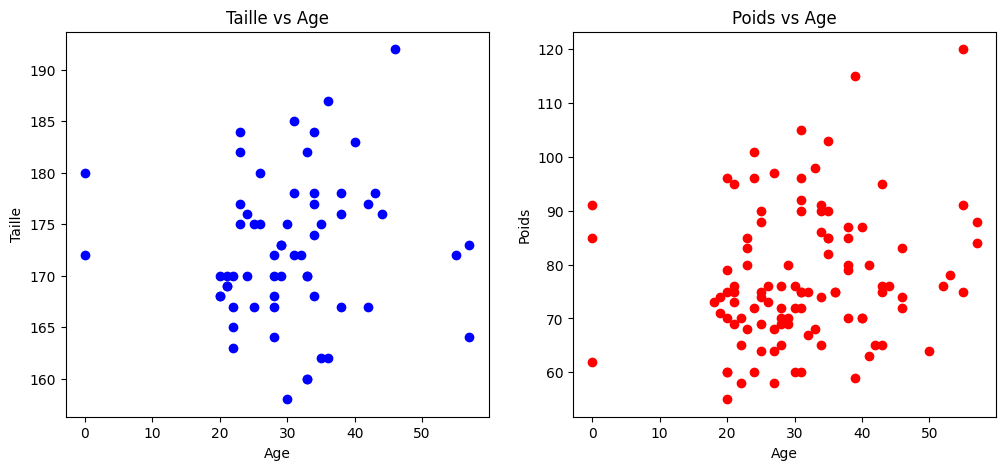

In [82]:

# 2. Afficher les nuages de points
plt.figure(figsize=(12, 5))

# Nuage de points pour Taille vs Age
plt.subplot(1, 2, 1)
plt.scatter(df_taille_non_manquante['Age'], df_taille_non_manquante['Taille '], color='blue')
plt.title('Taille vs Age')
plt.xlabel('Age')
plt.ylabel('Taille')

# Nuage de points pour Poids vs Age
plt.subplot(1, 2, 2)
plt.scatter(df_poids_non_manquant['Age'], df_poids_non_manquant['Poids'], color='red')
plt.title('Poids vs Age')
plt.xlabel('Age')
plt.ylabel('Poids')

plt.show()


In [83]:

# 3. Entraîner deux modèles de régression linéaire

# Modèle pour prédire la taille en fonction de l'âge
X_taille = df_taille_non_manquante[['Age']]
y_taille = df_taille_non_manquante['Taille ']

model_taille = LinearRegression()
model_taille.fit(X_taille, y_taille)

# Prédictions pour la taille
y_taille_pred = model_taille.predict(X_taille)

# Évaluation du modèle pour la taille
print("Modèle de régression linéaire pour la taille :")
print(f"Coefficient (pente) : {model_taille.coef_[0]}")
print(f"Intercept : {model_taille.intercept_}")
print(f"R² : {r2_score(y_taille, y_taille_pred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_taille, y_taille_pred))}")

Modèle de régression linéaire pour la taille :
Coefficient (pente) : 0.05288537863152881
Intercept : 170.99144705508812
R² : 0.006043946076580209
RMSE : 6.945332162461632


In [84]:
# Modèle pour prédire le poids en fonction de l'âge
X_poids = df_poids_non_manquant[['Age']]
y_poids = df_poids_non_manquant['Poids']

model_poids = LinearRegression()
model_poids.fit(X_poids, y_poids)

# Prédictions pour le poids
y_poids_pred = model_poids.predict(X_poids)

# Évaluation du modèle pour le poids
print("\nModèle de régression linéaire pour le poids :")
print(f"Coefficient (pente) : {model_poids.coef_[0]}")
print(f"Intercept : {model_poids.intercept_}")
print(f"R² : {r2_score(y_poids, y_poids_pred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_poids, y_poids_pred))}")



Modèle de régression linéaire pour le poids :
Coefficient (pente) : 0.20591006494775033
Intercept : 70.9831687349164
R² : 0.033044973571296765
RMSE : 12.238100991701941


In [85]:


# Équation de régression linéaire
def predire_poids(age):
    return round(66.0347 + 0.3435 * age,0)

# Imputation des valeurs manquantes
data['Poids_imputé'] = data['Poids'].copy()  # Créez une nouvelle colonne pour stocker les valeurs imputées
data.loc[data['Poids'].isna(), 'Poids_imputé'] = data['Age'].apply(predire_poids)


In [86]:
# Équation de régression linéaire
def predire_poids(taille):
    return round(169.51 + 0.099 * taille,0)

# Imputation des valeurs manquantes
data['Taille_imputé'] = data['Taille '].copy()  # Créez une nouvelle colonne pour stocker les valeurs imputées
data.loc[data['Taille '].isna(), 'Taille_imputé'] = data['Age'].apply(predire_poids)

In [87]:
data

,Date de remplissage de la fiche,Date de naissance,Age,Niveau d'etude,Genre,Taille,Poids,Situation Matrimoniale (SM),Profession,Arrondissement de résidence,...,quartier_final,New_Arrondissement,Region,Arrondissement_final,New_Religion,Profession_clean,categorie,Categorie_final,Poids_imputé,Taille_imputé
0,1992-12-06,1992-12-06,0,Pas Précisé,Homme,NaN,NaN,Célibataire,Technicien d’etancheite,Douala 5,...,bepanda,Douala 5e,LITTORAL,Douala 5e,Catholique,technicien d’etancheite,technicien,pas precise,66.0,170.0
1,1995-01-09,1995-05-11,0,Secondaire,Homme,NaN,NaN,Célibataire,Mécanicien,Douala 5,...,pk14,Douala 5e,LITTORAL,None,Catholique,mecanicien,mecanicien,technicien & ingenieur,66.0,170.0
2,2013-01-30,1980-11-22,33,Pas Précisé,Homme,NaN,NaN,Célibataire,Soudeur,Douala (Non précisé ),...,non precise,Douala (Non précisé ),LITTORAL,None,Autres Chrétien,soudeur,soudeur,technicien & ingenieur,77.0,173.0
3,2015-05-07,1991-11-24,24,Pas Précisé,Femme,NaN,96.0,Célibataire,Estheticien,Douala (Non précisé ),...,douala,Douala (Non précisé ),LITTORAL,None,pas precise,estheticien,technicien,pas precise,96.0,172.0
4,2018-01-17,1994-02-20,24,Universitaire,Homme,NaN,NaN,Célibataire,Etudiant (e),Douala (Non précisé ),...,logbessou,Douala (Non précisé ),LITTORAL,Douala 5e,pas precise,etudiant (e),etudiant (e),etudiant (e),74.0,172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1903,2019-05-06,1982-03-06,37,Universitaire,Homme,NaN,NaN,Célibataire,R A S,Douala 5,...,ndobo,Douala 5e,LITTORAL,Douala 4e,Catholique,r a s,autres,menagere,79.0,173.0
1904,2019-12-09,1991-04-20,28,Secondaire,Homme,NaN,NaN,Célibataire,HOTELIER,Douala 2,...,new bell,Douala 2e,LITTORAL,None,Protestant,hotelier,autres,hotelier,76.0,172.0
1905,2019-12-06,1997-01-12,22,Secondaire,Homme,NaN,NaN,Célibataire,Commerçant (e),Douala 3,...,yassa,Douala 3e,LITTORAL,Douala 3e,pas precise,commercant (e),commercant (e),commercant (e),74.0,172.0
1906,2019-05-15,1991-05-05,28,Universitaire,Homme,NaN,NaN,Célibataire,TECHNICIEN GENIE CIVIL,Douala 5,...,bepanda,Douala 5e,LITTORAL,Douala 5e,pas precise,technicien genie civil,technicien,technicien & ingenieur,76.0,172.0



### taux d'hemoglobine

In [88]:
data.describe()

,Date de remplissage de la fiche,Date de naissance,Age,Taille,Poids,Date de dernières règles (DDR),date_dernier_don_clean,Jour,Annee,Mois,mois_ecart,Poids_imputé,Taille_imputé
count,1873,1873,1873.000000,62.000000,105.000000,39,1873,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000
mean,2019-06-09 15:23:21.174586368,1988-12-08 12:14:59.519487488,30.025627,172.596774,77.409524,2019-07-22 15:23:04.615384576,2017-04-06 07:52:03.331553792,15.382808,2018.935932,6.569140,27.436199,76.388147,172.468767
min,1989-10-31 00:00:00,1957-04-27 00:00:00,-120.000000,158.000000,55.000000,2019-01-25 00:00:00,1987-09-02 00:00:00,1.000000,1989.000000,1.000000,0.000000,25.000000,158.000000
25%,2019-03-27 00:00:00,1983-04-01 00:00:00,24.000000,168.000000,69.000000,2019-05-22 00:00:00,2017-12-26 12:00:00,8.000000,2019.000000,3.000000,14.000000,74.000000,172.000000
50%,2019-07-23 00:00:00,1989-10-11 00:00:00,30.000000,172.000000,75.000000,2019-07-23 00:00:00,2017-12-26 12:00:00,16.000000,2019.000000,7.000000,20.000000,76.000000,172.000000
75%,2019-10-04 00:00:00,1994-12-04 00:00:00,36.000000,177.000000,85.000000,2019-10-03 12:00:00,2017-12-26 12:00:00,23.000000,2019.000000,10.000000,23.000000,78.000000,173.000000
max,2020-10-12 00:00:00,2092-03-19 00:00:00,62.000000,192.000000,120.000000,2019-11-09 00:00:00,2020-10-06 00:00:00,31.000000,2020.000000,12.000000,380.000000,120.000000,192.000000
std,NaN,NaN,11.331089,7.023286,12.505149,NaN,NaN,8.647122,1.250707,3.503302,33.929954,4.786623,1.684270


In [89]:
bins = range(0, 65, 5)  # De 0 à 75 ans, avec un pas de 5

# Créer les tranches d'âge
data['Tranche_Age'] = pd.cut(data['Age'], bins=bins, right=False)
# Convertir en type catégoriel
data['Tranche_Age'] = data['Tranche_Age'].astype('category')

# Calculer les modes
modes = data['Tranche_Age'].mode()

# Choisir le premier mode
mode_value = modes[0]

# Remplacer les valeurs manquantes par le premier mode
data['Tranche_Age'] = data['Tranche_Age'].fillna(mode_value)



In [90]:
data['Tranche_Age'].value_counts()

Tranche_Age
[25, 30)    461
[30, 35)    368
[20, 25)    351
[35, 40)    285
[40, 45)    156
[45, 50)     75
[15, 20)     65
[0, 5)       53
[50, 55)     37
[55, 60)     19
[10, 15)      3
[5, 10)       0
Name: count, dtype: int64

In [91]:
data['Taux d’hémoglobine ']=data['Taux d’hémoglobine '].str.replace('g/dl','')
data['Taux d’hémoglobine ']=data['Taux d’hémoglobine '].str.replace(',','.')
data['Taux d’hémoglobine ']=data['Taux d’hémoglobine '].str.replace(' ','')

In [92]:
data['Taux d’hémoglobine ']=data['Taux d’hémoglobine '].astype(float)

In [93]:
data['Taux d’hémoglobine '] = data.groupby(['Genre ', 'Tranche_Age'])['Taux d’hémoglobine '].transform(
    lambda x: x.fillna(x.median())
)

C:\Users\FTAB TECH\AppData\Local\Temp\ipykernel_6148\3668642559.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data['Taux d’hémoglobine '] = data.groupby(['Genre ', 'Tranche_Age'])['Taux d’hémoglobine '].transform(


In [94]:
data['Taux d’hémoglobine '] 

0       12.7
1       15.5
2       14.0
3       12.4
4       13.9
        ... 
1903    14.1
1904    13.8
1905    14.3
1906    13.8
1907    13.8
Name: Taux d’hémoglobine , Length: 1873, dtype: float64


### Traitement des donnees pour l'analyse des sentiments

In [95]:
data['Autre raisons,  preciser '].unique()

array([nan, 'opérée', 'Aucune', 'cocaïne', 'maladie cardio vasculaire',
       'Pris de médicaments «\xa0DICLOJENAL\xa0»',
       'Prise d’un médicament «\xa0DICLOJENAC\xa0»',
       'Changé de partenaire et eu des rapports non protégé',
       'Rapport non protégé et changement de partenaire ',
       'A été transfusé ',
       'Eu à consommer de la cocaïne et d autre drogues ',
       'Voyagé dans des zones épidémiques ', 'Consommation de drogue ',
       'RAPPORTS NON PROTEGES', 'RAPPORT NON PROTEGER',
       'CONSOMMATION DE DROGUES', 'PAS DE RAISON SPECIFIQUES', 'RAS',
       'RAISON NON PRECISEE', 'RAPPORT NON PROTEGE'], dtype=object)

In [96]:
data['Si autres raison préciser '].unique()

array([nan, 'Mal de nerf', 'physiquement amorti',
       'maladie chronique, suivi medical regulier',
       'ANGINE DE LA POITRINE ,ARTÉRITE , INFARCTUS DU MYOCARDE ',
       'EU UNE ENDOSCOPIE ( FIBROSCOPIE,  GASTROSCOPIE, COLOSCOPIE .......)',
       'MENOPOSÉ', 'Consommation de drogue ', 'DROGUES',
       'Aucune information ', 'PAS D INFORMATION SUR SON DOSSIER',
       'EU UNE ENDOSCOPIE', 'TRAITE PAR ACUPUNCTURE',
       'ETE TRAITE PAR ACUPUNCTURE'], dtype=object)

In [97]:
combined_reasons = data['Si autres raison préciser '].dropna().tolist() + data['Autre raisons,  preciser '].dropna().tolist()


In [98]:
import nltk
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string

# Télécharger les stopwords si ce n'est pas déjà fait


# Fonction pour nettoyer le texte (convertir en minuscules, retirer la ponctuation et les stopwords)
def clean_text(text):
    stop_words = set(stopwords.words('french'))  # Liste des mots vides en français
    cleaned_text = []
    
    # Nettoyage du texte
    for phrase in text:
        # Convertir la phrase en minuscules, retirer la ponctuation et découper en mots
        words = phrase.lower().split()
        words = [word.strip(string.punctuation) for word in words]  # Retirer la ponctuation
        words = [word for word in words if word not in stop_words]  # Supprimer les stopwords
        cleaned_text.extend(words)
    
    return cleaned_text

# Fonction pour analyser la fréquence des mots et générer un nuage de mots
def generate_wordcloud(text):
    # Nettoyer le texte avant de l'analyser
    cleaned_tokens = clean_text(text)
    
    # Calculer la fréquence des mots
    word_freq = Counter(cleaned_tokens)
    
    # Créer le nuage de mots à partir des fréquences
    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_freq)
    
    # Afficher le nuage de mots
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Exemple d'utilisation



In [99]:
data['commentaire']=str(data["Autre raisons,  preciser "])+' '+str(data['Si autres raison préciser '])

In [100]:
data['commentaire'] = data["Autre raisons,  preciser "].fillna('') + ' ' + data['Si autres raison préciser '].fillna('')


In [101]:
data['commentaire'].unique()

array([' ', 'opérée ', ' Mal de nerf', 'Aucune ', 'cocaïne ',
       'maladie cardio vasculaire ', ' physiquement amorti',
       ' maladie chronique, suivi medical regulier',
       ' ANGINE DE LA POITRINE ,ARTÉRITE , INFARCTUS DU MYOCARDE ',
       'Pris de médicaments «\xa0DICLOJENAL\xa0» ',
       'Prise d’un médicament «\xa0DICLOJENAC\xa0» ',
       'Changé de partenaire et eu des rapports non protégé ',
       'Rapport non protégé et changement de partenaire  ',
       'A été transfusé  ',
       'Eu à consommer de la cocaïne et d autre drogues  ',
       ' EU UNE ENDOSCOPIE ( FIBROSCOPIE,  GASTROSCOPIE, COLOSCOPIE .......)',
       'Voyagé dans des zones épidémiques  ', ' MENOPOSÉ',
       ' Consommation de drogue ', 'Consommation de drogue  ', ' DROGUES',
       ' Aucune information ', 'RAPPORTS NON PROTEGES ',
       ' PAS D INFORMATION SUR SON DOSSIER', ' EU UNE ENDOSCOPIE',
       ' TRAITE PAR ACUPUNCTURE', 'RAPPORT NON PROTEGER ',
       'CONSOMMATION DE DROGUES ', 'PAS DE 

In [102]:
commentaire=data['commentaire']

In [103]:
import pandas as pd
from transformers import pipeline, AutoModelForSequenceClassification, AutoTokenizer

# Chemin où le modèle et le tokenizer sont enregistrés
model_path = "C:/Users/FTAB TECH/DASH/modele"

# Charger le modèle et le tokenizer
model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

# Créer un pipeline pour l'analyse de texte
classifier = pipeline('text-classification', model=model, tokenizer=tokenizer)

# Exemple de DataFrame


# Fonction pour appliquer le modèle à chaque texte en batch
def analyser_emotion_batch(textes):
    resultats = classifier(textes, truncation=True, max_length=512)
    return [(res['label'], res['score']) for res in resultats]

# Appliquer la fonction à chaque ligne du DataFrame

data[['label', 'score']] = pd.DataFrame(
    analyser_emotion_batch(data['commentaire'].tolist()),
    index=data.index
)

# Afficher le DataFrame avec les émotions et les scores


Device set to use cpu


In [106]:
data['label'].unique()

array(['anger', 'love', 'joy', 'fear'], dtype=object)

In [108]:
def ajouter_colonnes_sentiment_classement(df):
    """
    Ajoute deux colonnes au DataFrame :
    - 'sentiment' : 'positif' si le label est 'joy' ou 'love', sinon 'négatif'.
    - 'classement' : 'douteux' si score < 0.5, 'acceptable' si 0.5 <= score < 0.7, 'bon' si score >= 0.7.
    """
    # Colonne 'sentiment'
    df['sentiment'] = df['label'].apply(lambda x: 'positif' if x in ['joy', 'love'] else 'négatif')
    
    # Colonne 'classement'
    df['classement'] = df['score'].apply(
        lambda x: 'douteux' if x < 0.5 else ('acceptable' if x < 0.7 else 'bon')
    )
    
    return df

dat=ajouter_colonnes_sentiment_classement(data)


In [109]:
dat

,Date de remplissage de la fiche,Date de naissance,Age,Niveau d'etude,Genre,Taille,Poids,Situation Matrimoniale (SM),Profession,Arrondissement de résidence,...,categorie,Categorie_final,Poids_imputé,Taille_imputé,Tranche_Age,commentaire,label,score,sentiment,classement
0,1992-12-06,1992-12-06,0,Pas Précisé,Homme,NaN,NaN,Célibataire,Technicien d’etancheite,Douala 5,...,technicien,pas precise,66.0,170.0,"[0, 5)",,anger,0.291548,négatif,douteux
1,1995-01-09,1995-05-11,0,Secondaire,Homme,NaN,NaN,Célibataire,Mécanicien,Douala 5,...,mecanicien,technicien & ingenieur,66.0,170.0,"[0, 5)",,anger,0.291548,négatif,douteux
2,2013-01-30,1980-11-22,33,Pas Précisé,Homme,NaN,NaN,Célibataire,Soudeur,Douala (Non précisé ),...,soudeur,technicien & ingenieur,77.0,173.0,"[30, 35)",,anger,0.291548,négatif,douteux
3,2015-05-07,1991-11-24,24,Pas Précisé,Femme,NaN,96.0,Célibataire,Estheticien,Douala (Non précisé ),...,technicien,pas precise,96.0,172.0,"[20, 25)",,anger,0.291548,négatif,douteux
4,2018-01-17,1994-02-20,24,Universitaire,Homme,NaN,NaN,Célibataire,Etudiant (e),Douala (Non précisé ),...,etudiant (e),etudiant (e),74.0,172.0,"[20, 25)",,anger,0.291548,négatif,douteux
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1903,2019-05-06,1982-03-06,37,Universitaire,Homme,NaN,NaN,Célibataire,R A S,Douala 5,...,autres,menagere,79.0,173.0,"[35, 40)",,anger,0.291548,négatif,douteux
1904,2019-12-09,1991-04-20,28,Secondaire,Homme,NaN,NaN,Célibataire,HOTELIER,Douala 2,...,autres,hotelier,76.0,172.0,"[25, 30)",,anger,0.291548,négatif,douteux
1905,2019-12-06,1997-01-12,22,Secondaire,Homme,NaN,NaN,Célibataire,Commerçant (e),Douala 3,...,commercant (e),commercant (e),74.0,172.0,"[20, 25)",,anger,0.291548,négatif,douteux
1906,2019-05-15,1991-05-05,28,Universitaire,Homme,NaN,NaN,Célibataire,TECHNICIEN GENIE CIVIL,Douala 5,...,technicien,technicien & ingenieur,76.0,172.0,"[25, 30)",,anger,0.291548,négatif,douteux


In [110]:

data.rename_axis('ID').to_csv("challenge.csv", index=True)

In [113]:
comments = data['Si autres raison préciser '].dropna().tolist() + data['Autre raisons,  preciser '].dropna().tolist()
    

In [114]:
comments

['Mal de nerf',
 'physiquement amorti',
 'maladie chronique, suivi medical regulier',
 'ANGINE DE LA POITRINE ,ARTÉRITE , INFARCTUS DU MYOCARDE ',
 'EU UNE ENDOSCOPIE ( FIBROSCOPIE,  GASTROSCOPIE, COLOSCOPIE .......)',
 'MENOPOSÉ',
 'Consommation de drogue ',
 'DROGUES',
 'Aucune information ',
 'PAS D INFORMATION SUR SON DOSSIER',
 'EU UNE ENDOSCOPIE',
 'TRAITE PAR ACUPUNCTURE',
 'ETE TRAITE PAR ACUPUNCTURE',
 'opérée',
 'Aucune',
 'cocaïne',
 'maladie cardio vasculaire',
 'Pris de médicaments «\xa0DICLOJENAL\xa0»',
 'Prise d’un médicament «\xa0DICLOJENAC\xa0»',
 'Changé de partenaire et eu des rapports non protégé',
 'Rapport non protégé et changement de partenaire ',
 'A été transfusé ',
 'Eu à consommer de la cocaïne et d autre drogues ',
 'Voyagé dans des zones épidémiques ',
 'Consommation de drogue ',
 'Consommation de drogue ',
 'RAPPORTS NON PROTEGES',
 'RAPPORT NON PROTEGER',
 'CONSOMMATION DE DROGUES',
 'PAS DE RAISON SPECIFIQUES',
 'RAS',
 'RAISON NON PRECISEE',
 'RAPPORT N

In [111]:
data

,Date de remplissage de la fiche,Date de naissance,Age,Niveau d'etude,Genre,Taille,Poids,Situation Matrimoniale (SM),Profession,Arrondissement de résidence,...,categorie,Categorie_final,Poids_imputé,Taille_imputé,Tranche_Age,commentaire,label,score,sentiment,classement
0,1992-12-06,1992-12-06,0,Pas Précisé,Homme,NaN,NaN,Célibataire,Technicien d’etancheite,Douala 5,...,technicien,pas precise,66.0,170.0,"[0, 5)",,anger,0.291548,négatif,douteux
1,1995-01-09,1995-05-11,0,Secondaire,Homme,NaN,NaN,Célibataire,Mécanicien,Douala 5,...,mecanicien,technicien & ingenieur,66.0,170.0,"[0, 5)",,anger,0.291548,négatif,douteux
2,2013-01-30,1980-11-22,33,Pas Précisé,Homme,NaN,NaN,Célibataire,Soudeur,Douala (Non précisé ),...,soudeur,technicien & ingenieur,77.0,173.0,"[30, 35)",,anger,0.291548,négatif,douteux
3,2015-05-07,1991-11-24,24,Pas Précisé,Femme,NaN,96.0,Célibataire,Estheticien,Douala (Non précisé ),...,technicien,pas precise,96.0,172.0,"[20, 25)",,anger,0.291548,négatif,douteux
4,2018-01-17,1994-02-20,24,Universitaire,Homme,NaN,NaN,Célibataire,Etudiant (e),Douala (Non précisé ),...,etudiant (e),etudiant (e),74.0,172.0,"[20, 25)",,anger,0.291548,négatif,douteux
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1903,2019-05-06,1982-03-06,37,Universitaire,Homme,NaN,NaN,Célibataire,R A S,Douala 5,...,autres,menagere,79.0,173.0,"[35, 40)",,anger,0.291548,négatif,douteux
1904,2019-12-09,1991-04-20,28,Secondaire,Homme,NaN,NaN,Célibataire,HOTELIER,Douala 2,...,autres,hotelier,76.0,172.0,"[25, 30)",,anger,0.291548,négatif,douteux
1905,2019-12-06,1997-01-12,22,Secondaire,Homme,NaN,NaN,Célibataire,Commerçant (e),Douala 3,...,commercant (e),commercant (e),74.0,172.0,"[20, 25)",,anger,0.291548,négatif,douteux
1906,2019-05-15,1991-05-05,28,Universitaire,Homme,NaN,NaN,Célibataire,TECHNICIEN GENIE CIVIL,Douala 5,...,technicien,technicien & ingenieur,76.0,172.0,"[25, 30)",,anger,0.291548,négatif,douteux
